In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [ ]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is already installed.
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: atharvaweginwar28
Your Kaggle Key: ··········


100%|██████████| 109M/109M [00:06<00:00, 18.8MB/s]


In [ ]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
df.shape


(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [ ]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [ ]:
del df

In [ ]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A3FQLBWQ6IXSPU,B008D4X4GW,5.0,1377993600
1,A2K2VBP7DCGPHT,B005FE72Q6,5.0,1358899200
2,A2E9YM5QNPS2ZH,B004QQY2JO,5.0,1396915200
3,A3V2A01DZIMV6G,B000VOC90Y,5.0,1383091200
4,A1V6OFTU6FI8CV,B003VAK1G4,1.0,1318550400


In [ ]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [ ]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012447e+00
std,1.381105e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [ ]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
#visualizing the data after dropping timestamp column
electronics_data.head()

,userId,productId,rating
0,A3FQLBWQ6IXSPU,B008D4X4GW,5.0
1,A2K2VBP7DCGPHT,B005FE72Q6,5.0
2,A2E9YM5QNPS2ZH,B004QQY2JO,5.0
3,A3V2A01DZIMV6G,B000VOC90Y,5.0
4,A1V6OFTU6FI8CV,B003VAK1G4,1.0


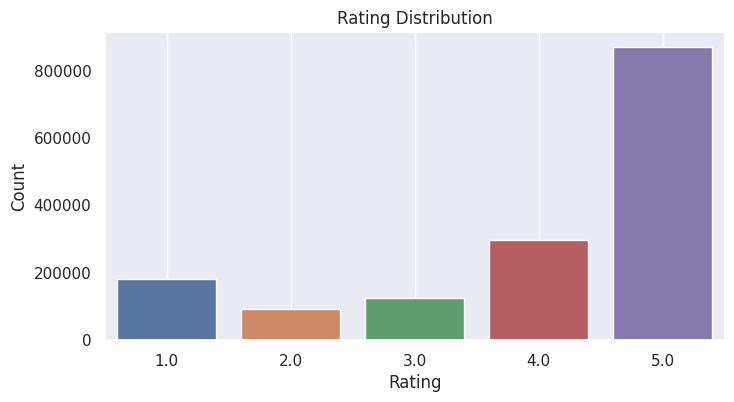

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1226002
Total unique products :  237988


In [ ]:
#analyzing the rating by user
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
ADLVFFE4VBT8      118
A3OXHLG6DIBRW8    115
A5JLAU2ARJ0BO     108
A6FIAB28IS79       96
A1ODOGXEYECQQ8     78
Name: rating, dtype: int64

In [ ]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 25 


In [ ]:
#using popularity based recommendation to recommend the product to new user who newly signed up
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [ ]:
data.head()

,userId,productId,rating
0,A3FQLBWQ6IXSPU,B008D4X4GW,5.0
1,A2K2VBP7DCGPHT,B005FE72Q6,5.0
2,A2E9YM5QNPS2ZH,B004QQY2JO,5.0
3,A3V2A01DZIMV6G,B000VOC90Y,5.0
7,A3C6CM4410THFG,B006JG5S6K,5.0


In [ ]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head()

productId
B0074BW614    3563
B00DR0PDNE    3332
B007WTAJTO    2808
B0019EHU8G    2525
B006GWO5WK    2426
Name: rating, dtype: int64

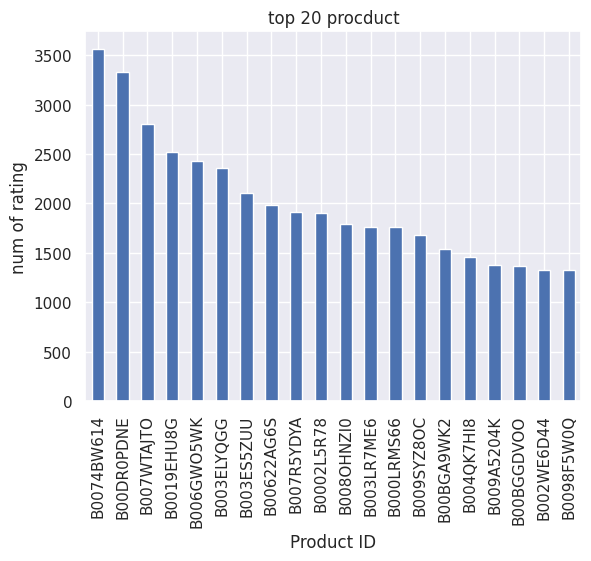

In [ ]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [ ]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.354067
1400532655,3.552083
140053271X,3.623377
1400599997,3.900000
B00000DM9W,4.661290


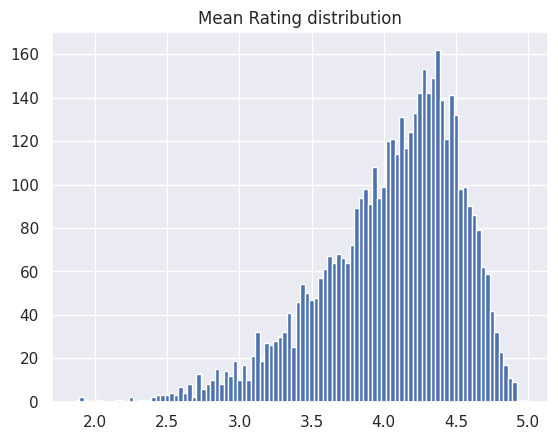

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.8794416256754145

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.354067,209
1400532655,3.552083,96
140053271X,3.623377,77
1400599997,3.900000,50
B00000DM9W,4.661290,62


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]


,rating,rating_counts
productId,,
B0074BW614,4.499018,3563


In [ ]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  123


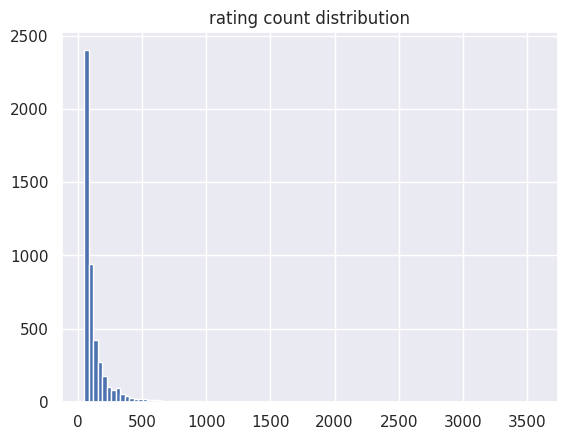

In [ ]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

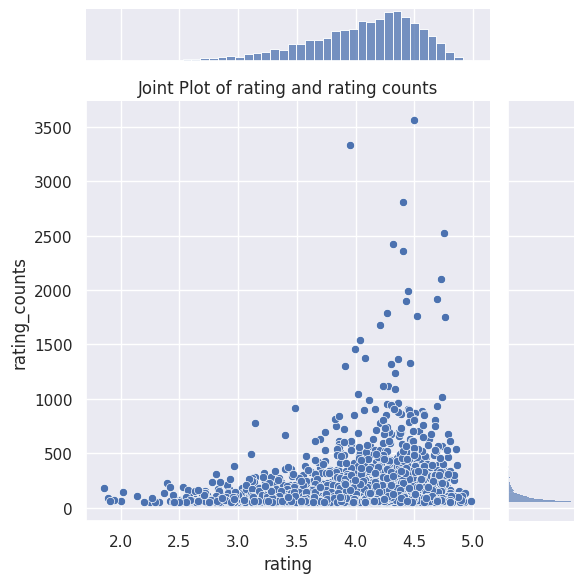

In [ ]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

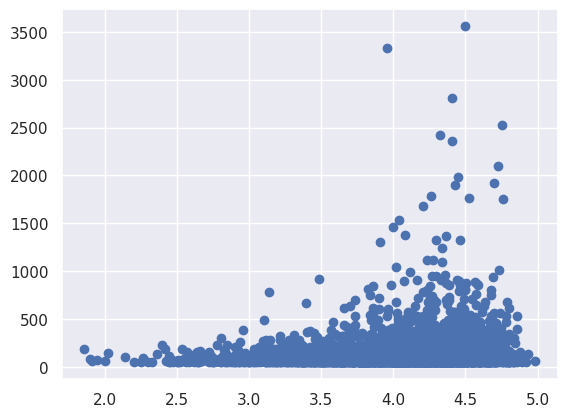

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11806248421621247 


In [ ]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing...


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.3.2)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.23.5)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163751 sha256=b5e5f34df30739b26c02cef78df7770d6ea18bb8524e090e544ebc90f2798492

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [ ]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)

In [ ]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3107


1.310742484454086

In [ ]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,1400599997,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K2YR,...,B00HTPHK5W,B00HVLUR86,B00HWSXVDG,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF70QCW,B00INNP5VU,B00ISGCAJM,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A00063061AK7XBIZLCOXJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0103047AS0C8QKUI0X2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0140712R69E7ZY58CEW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0149316MO8B2K2OB2HD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0188546ES14USV0TFXO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19902, 4400)

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00063061AK7XBIZLCOXJ,A0103047AS0C8QKUI0X2,A0140712R69E7ZY58CEW,A0149316MO8B2K2OB2HD,A0188546ES14USV0TFXO,A01919943HHNPNFJ6WM7U,A0291684Z2NYFRGONPLB,A0378617OY5YINQO9L4X,A04033861Y655321AUGPZ,A043311623S2B8O82GJC2,...,AZXEDNQXBCXMU,AZXKG69RR28G4,AZY3M15ILER0C,AZY69AK0E74MS,AZY8LGHVF8GMZ,AZY9K1Z8FSHGW,AZYOBQYNH09NY,AZYOJUA7TY8ZE,AZZFUW8RA2W4G,AZZW390GP15LN
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(4400, 19902)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4400, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4400, 4400)

In [ ]:
x_ratings_matrix.index[10]

'B00001OWYM'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

12


In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4400,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(148, 4400)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B00006HYKM',
 'B00008OE6I',
 'B00008Y1BX',
 'B0000BVYTV',
 'B000165F26',
 'B00067LYFW',
 'B0007RV3IE',
 'B0007U0GZM',
 'B000AA2RCY',
 'B000ALLMI8',
 'B000EGQS5G',
 'B000EIXX4S',
 'B000FKKWVM',
 'B000HCT12O',
 'B000OAHOVO',
 'B000UY3NR8',
 'B000Z80ICM',
 'B00114162K',
 'B0015ACUKC']